## Classification methods for > 2 classes and > 2 features

- linear classification methods: logistic regression, SVM, KNN
- non-linear methods: polynomial SVM, RBF SVM

## Visualising higher dimensional data: PCA 


## Controlling overfitting
 - repairing class unbalance
 - regularisation and penalties
 - class weights

## Model selection and optimisation
- tuning hyper-parameters using cross validation


## Synthetic datasets:
we use two classes of datasets:
- linearly separable to various tunable degrees
- non linearly separable, i.e., 2d circles


In [ ]:
import numpy as np
from numpy.random import randn

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification, make_circles
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, classification_report, average_precision_score, auc, roc_auc_score, roc_curve
from sklearn.decomposition import PCA

import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import seaborn as sns

In [ ]:
# https://towardsdatascience.com/synthetic-data-generation-a-must-have-skill-for-new-data-scientists-915896c0c1ae
# see https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles
# and https://scikit-learn.org/stable/datasets/index.html#sample-generators

def makeDataset(kind='classification'):

    if kind == 'classification':
        X, CL = make_classification(n_samples=1000, n_classes=5, n_features=100, 
                                   n_redundant=10, n_informative=80, random_state=5, n_clusters_per_class=2,
                                   class_sep = -1,
                                   flip_y = 0.5)

        df = pd.DataFrame(data=X[:,0], columns=['X1'])
        df['X2'] = X[:,1]
        df['CL'] = CL

    return X, CL

In [ ]:
def scale(XTrain, XTest):
    scaler = StandardScaler()
    scaler.fit(XTrain)
    XTrainScaled = scaler.transform(XTrain)
    XTestScaled = scaler.transform(XTest)
    
    return XTrainScaled, XTestScaled


In [ ]:
def evaluationReport(CLTrain, CL_pred_Train, CLTest, CL_pred_Test):
    
    accTrain = accuracy_score(CLTrain, CL_pred_Train)
    accTest = accuracy_score(CLTest, CL_pred_Test)

    print('logit classification accuracy on training set: {:.2f}'.format(accTrain))
    print('logit classification accuracy on test set: {:.2f}'.format(accTest))
    
    print('full classification report (on test set:)')
    print(classification_report(CLTest, CL_pred_Test))
    
    print('(Note: average precision score not supported for multi-class classification')

In [ ]:
def logit(XTrain, CLTrain, XTest, CLTest):

    # generate model using training set, and evaluate using test set

    clf = LogisticRegression(penalty='l2', C=1, solver='lbfgs',multi_class='ovr')
    clf.fit(XTrain, CLTrain)

    # predictions on training set
    CL_pred_Train = clf.predict(XTrain)

    # predictions on test set
    CL_pred_Test = clf.predict(XTest)

    return clf, CL_pred_Train, CL_pred_Test


In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
def LinearSVM(XTrain, CLTrain, XTest, CLTest):
    
    svm = LinearSVC(C=1, loss= "hinge")
    clf = svm.fit(XTrain, CLTrain)

    # predictions on training set
    CL_pred_Train = clf.predict(XTrain)

    # predictions on test set
    CL_pred_Test = clf.predict(XTest)

    return clf, CL_pred_Train, CL_pred_Test
    

In [ ]:
def SVM(XTrain, CLTrain, XTest, CLTest, kernel):
    
    svm = SVC(kernel = kernel, degree = 3, C=5, coef0=1)
    clf = svm.fit(XTrain, CLTrain)

    # predictions on training set
    CL_pred_Train = clf.predict(XTrain)

    # predictions on test set
    CL_pred_Test = clf.predict(XTest)

    return clf, CL_pred_Train , CL_pred_Test

In [ ]:
def plotTrainTest(XTrain, CLTrain, XTest, CLTest):
    fig = plt.figure(figsize=(20,6))
    fig.subplots_adjust(hspace=1, wspace=0.4)

    ax = fig.add_subplot(1, 2, 1)
    sns.scatterplot(x=XTrain[:,0],y=XTrain[:,1], hue=CLTrain, ax=ax)  # plot training set
    ax.set_title("training set")

    ax = fig.add_subplot(1,2, 2)
    sns.scatterplot(x=XTest[:,0],y=XTest[:,1], hue=CLTest, ax=ax)
    ax.set_title("test set")
    plt.show()

In [ ]:
def plotLinearFitTrainTest(clf, XTrain, CLTrain, XTest, CLTest):
    
    x_Train_min, x_Train_max = XTrain[:, 0].min() - .5, XTrain[:, 0].max() + .5
    x_Test_min, x_Test_max = XTest[:, 0].min() - .5, XTest[:, 0].max() + .5

    x_min = min(x_Train_min, x_Test_min)
    x_max = max(x_Train_max, x_Test_max)
            
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(x_min, x_max)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    fig = plt.figure(figsize=(20,6))
    fig.subplots_adjust(hspace=1, wspace=0.4)

    ax = fig.add_subplot(1, 2, 1)
    sns.scatterplot(x=XTrain[:,0],y=XTrain[:,1], hue=CLTrain)  # plot training set
    ax.set_title("training set with separation line")
    ax2 = ax.twinx()
    sns.regplot(x=xx,y=yy, ax=ax2)

    ax = fig.add_subplot(1,2, 2)
    sns.scatterplot(x=XTest[:,0],y=XTest[:,1], hue=CLTest)
    ax.set_title("test set with separation line")
    ax2 = ax.twinx()
    sns.regplot(x=xx,y=yy, ax= ax2)
    plt.show()
    

In [ ]:
def plotContourFitTrainTest(clf, XTrain, CLTrain, XTest, CLTest):

    h = .02  # step size in the mesh

    fig = plt.figure(figsize=(20,6))
    fig.subplots_adjust(hspace=1, wspace=0.4)
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])


    ## plot training set
    x_min, x_max = XTrain[:, 0].min() - .5, XTrain[:, 0].max() + .5
    y_min, y_max = XTrain[:, 1].min() - .5, XTrain[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    ax = fig.add_subplot(1, 2, 1)
    sns.scatterplot(x=XTrain[:,0],y=XTrain[:,1], hue=CLTrain, ax=ax)  # plot training set
    ax.set_title("training set wih contour line")
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    
    
    ## plot test set
    x_min, x_max = XTest[:, 0].min() - .5, XTest[:, 0].max() + .5
    y_min, y_max = XTest[:, 1].min() - .5, XTest[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    ax = fig.add_subplot(1, 2, 2)
    sns.scatterplot(x=XTest[:,0],y=XTest[:,1], hue=CLTest, ax=ax)  # plot training set
    ax.set_title("test set wih contour line")
    
    # Plot the decision boundary.
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)



In [ ]:
def plotROC(clf, XTest, CLTest):
    
    if hasattr(clf, "decision_function"):
        print("using decision_function")
        probs = clf.decision_function(XTest)
        preds = probs
    else:
        print("using predict_proba")
        probs = clf.predict_proba(XTest)
        preds = probs[:,1]

    fpr, tpr, threshold = roc_curve(CLTest, preds)
    roc_auc = auc(fpr, tpr)

    print("\n\n====== ROC ======")
    print("roc_auc_score = %0.2f" % roc_auc_score(CLTest, CL_pred_Test))
    print("auc = %0.2f" % roc_auc)

    fig = plt.figure()
    plt.title('ROC curve')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## generate a " well-behaved", linearly separable model with >2 features

In [ ]:
X, CL = makeDataset(kind='classification')


## use PCA to map the features to a 2d space so it can be visualised  

In [ ]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

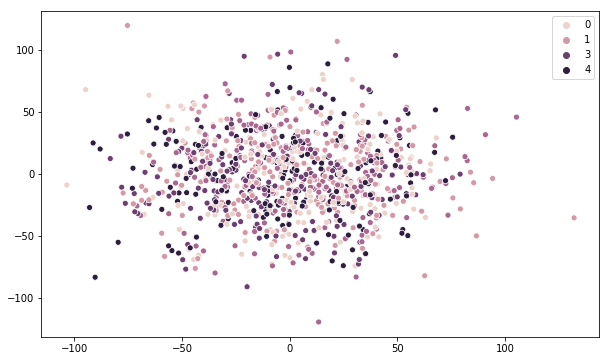

In [ ]:
# plot entire X,Y
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_r[:,0], y=X_r[:,1], hue=CL)

## split the dataset into train vs test

In [ ]:
# note: we use X not X_r! X_r is just for visualisatino purposes
XTrain, XTest, CLTrain, CLTest = train_test_split(X, CL, test_size = 0.33, random_state = 10)

## logistic regression

In [ ]:
# plotTrainTest(XTrain, CLTrain, XTest, CLTest)

XTrainScaled, XTestScaled  = scale(XTrain, XTest)

clf, CL_pred_Train, CL_pred_Test = logit(XTrainScaled, CLTrain, XTestScaled, CLTest)

evaluationReport(CLTrain, CL_pred_Train, CLTest, CL_pred_Test)

# ROC not supported for multi-class classification 
# plotROC(clf, XTest, CLTest)

logit classification accuracy on training set: 0.53
logit classification accuracy on test set: 0.27
full classification report (on test set:)
              precision    recall  f1-score   support

           0       0.28      0.24      0.26        74
           1       0.33      0.32      0.33        65
           2       0.28      0.24      0.26        62
           3       0.21      0.24      0.22        66
           4       0.28      0.32      0.30        63

    accuracy                           0.27       330
   macro avg       0.28      0.27      0.27       330
weighted avg       0.28      0.27      0.27       330

(Note: average precision score not supported for multi-class classification


## SVM (linear)

In [ ]:
XTrainScaled, XTestScaled  = scale(XTrain, XTest)

In [ ]:
clf, CL_pred_Train, CL_pred_Test = LinearSVM(XTrainScaled, CLTrain, XTestScaled, CLTest)

evaluationReport(CLTrain, CL_pred_Train, CLTest, CL_pred_Test)

# ROC not supported for >2 classes
# plotROC(clf, XTest, CLTest)

logit classification accuracy on training set: 0.55
logit classification accuracy on test set: 0.25
full classification report (on test set:)
              precision    recall  f1-score   support

           0       0.31      0.26      0.28        74
           1       0.31      0.34      0.32        65
           2       0.26      0.29      0.28        62
           3       0.18      0.20      0.19        66
           4       0.22      0.19      0.21        63

    accuracy                           0.25       330
   macro avg       0.25      0.25      0.25       330
weighted avg       0.26      0.25      0.25       330

(Note: average precision score not supported for multi-class classification


/Users/npm65/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/Users/npm65/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


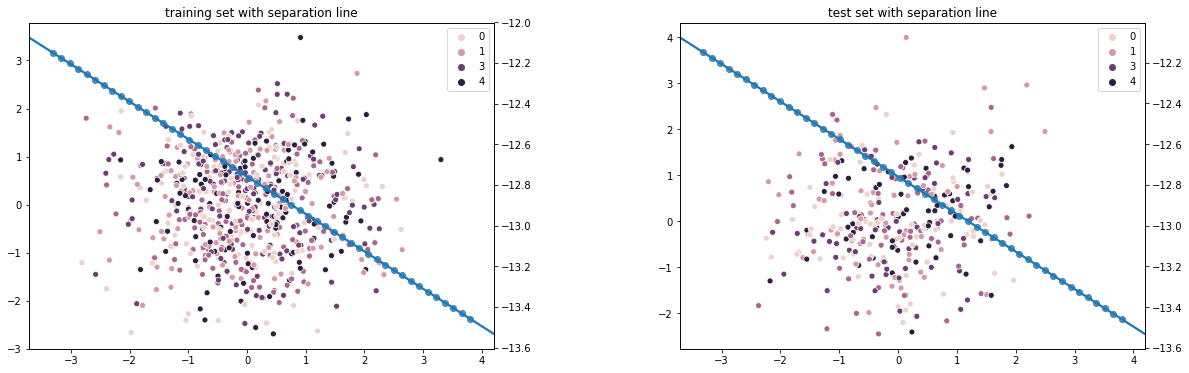

logit classification accuracy on training set: 0.54
logit classification accuracy on test set: 0.26
full classification report (on test set:)
              precision    recall  f1-score   support

           0       0.30      0.26      0.28        74
           1       0.32      0.35      0.33        65
           2       0.29      0.29      0.29        62
           3       0.17      0.20      0.18        66
           4       0.24      0.21      0.22        63

    accuracy                           0.26       330
   macro avg       0.26      0.26      0.26       330
weighted avg       0.26      0.26      0.26       330

(Note: average precision score not supported for multi-class classification


In [ ]:
clf, CL_pred_Train, CL_pred_Test = LinearSVM(XTrainScaled, CLTrain, XTestScaled, CLTest)

plotLinearFitTrainTest(clf, XTrainScaled, CLTrain, XTestScaled, CLTest)

evaluationReport(CLTrain, CL_pred_Train, CLTest, CL_pred_Test)

# plotROC(clf, XTest, CLTest)

## SVM with a polynomial kernel

In [ ]:
clf, CL_pred_Train, CL_pred_Test  = SVM(XTrainScaled, CLTrain, XTestScaled, CLTest, kernel='poly')

evaluationReport(CLTrain, CL_pred_Train, CLTest, CL_pred_Test)

logit classification accuracy on training set: 1.00
logit classification accuracy on test set: 0.30
full classification report (on test set:)
              precision    recall  f1-score   support

           0       0.35      0.35      0.35        74
           1       0.35      0.34      0.34        65
           2       0.25      0.24      0.25        62
           3       0.25      0.29      0.27        66
           4       0.31      0.29      0.30        63

    accuracy                           0.30       330
   macro avg       0.30      0.30      0.30       330
weighted avg       0.30      0.30      0.30       330

(Note: average precision score not supported for multi-class classification


## SVM with RBF kernel

In [ ]:
clf, CL_pred_Train, CL_pred_Test  = SVM(XTrainScaled, CLTrain, XTestScaled, CLTest, kernel='rbf')

evaluationReport(CLTrain, CL_pred_Train, CLTest, CL_pred_Test)

logit classification accuracy on training set: 1.00
logit classification accuracy on test set: 0.31
full classification report (on test set:)
              precision    recall  f1-score   support

           0       0.37      0.34      0.35        74
           1       0.33      0.38      0.35        65
           2       0.26      0.23      0.24        62
           3       0.25      0.27      0.26        66
           4       0.32      0.32      0.32        63

    accuracy                           0.31       330
   macro avg       0.31      0.31      0.31       330
weighted avg       0.31      0.31      0.31       330

(Note: average precision score not supported for multi-class classification
